In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
from scipy.stats import poisson
import seaborn as sns
import sklearn.neighbors
import matplotlib.pyplot as plt
import Levenshtein

import sys
sys.path.append('..')
from lib import *

from pyrepseq import *
import random

plt.style.use('../peptidome.mplstyle')

In [2]:
k = 9
selfset = set(count_kmers_proteome(human, k, clean=True))

In [3]:
# only human host
df_t = load_iedb_tcellepitopes(human_only=True)
print(df_t.shape[0])

285467


In [4]:
# only MHC I epitopes
df_t = df_t[df_t['MHC', 'Class']=='I']
print(df_t.shape[0])

83870


In [5]:
# only epitopes of length k
mask = df_t['Epitope', 'Description'].apply(len)==k
df_t = df_t[mask]
print(df_t.shape[0])

45769


In [6]:
# no host epitopes
host = 'Homo sapiens'
mask = ~df_t['Epitope', 'Parent Species'].str.contains(host, na=False)
df_t = df_t[mask]
print(df_t.shape[0])

38800


In [7]:
# exclude autoimmune / allergy / cancer epitopes
mask = ~(df_t['1st in vivo Process', 'Process Type'].isin(['Occurrence of autoimmune disease', 
                                                           'Occurrence of allergy',
                                                           'Occurrence of cancer']))
df_t = df_t[mask]
print(df_t.shape[0])

36172


In [8]:
# restrict to ELISPOT assay
mask = df_t['Assay', 'Method/Technique'] == 'ELISPOT'
df_t = df_t[mask]
print(df_t.shape[0])

19935


In [9]:
# uniquify epitopes by keeping only the most frequent qualitative measure
def most_frequent(x):
    counts = x.value_counts(dropna=False)
    if len(counts):
        return counts.index[0]
    else:
        print(x, counts)
    return np.nan
d = df_t[[('Epitope', 'Description'), ('Assay', 'Positive')]].groupby(('Epitope', 'Description')).agg(most_frequent)
d = d.reset_index()
len(d)

7261

In [10]:
def min_distance(x, reference):
    if x in reference:
        return 0
    if dist1(x, reference):
        return 1
    if dist2(x, reference):
        return 2
    if dist3(x, reference):
        return 3
    return 4

In [11]:
d['nndist'] = d['Epitope', 'Description'].apply(lambda x: min_distance(x, selfset))

In [12]:
df_t[df_t['Epitope', 'Description'].isin(set(d[d['nndist']==4]['Epitope', 'Description']))]

Reference  \
                                 Assay IRI   
21076    http://www.iedb.org/assay/1295333   
21077    http://www.iedb.org/assay/1295334   
21078    http://www.iedb.org/assay/1295335   
21822    http://www.iedb.org/assay/1296079   
21823    http://www.iedb.org/assay/1296080   
21824    http://www.iedb.org/assay/1296081   
22272    http://www.iedb.org/assay/1296529   
22273    http://www.iedb.org/assay/1296530   
22274    http://www.iedb.org/assay/1296531   
22782    http://www.iedb.org/assay/1297046   
22783    http://www.iedb.org/assay/1297047   
22784    http://www.iedb.org/assay/1297048   
22893    http://www.iedb.org/assay/1297157   
22894    http://www.iedb.org/assay/1297158   
22895    http://www.iedb.org/assay/1297159   
41592    http://www.iedb.org/assay/1323713   
101796   http://www.iedb.org/assay/1598900   
194184   http://www.iedb.org/assay/1941324   
194258   http://www.iedb.org/assay/1941398   
194262   http://www.iedb.org/assay/1941402   
197415   http://www.iedb.org/assay/1955522   
208545   http://www.iedb.org/assay/1984719   
249363   http://www.iedb.org/assay/2104425   
265705   http://www.iedb.org/assay/2131462   
265707   http://www.iedb.org/assay/2131464   
265708   http://www.iedb.org/assay/2131465   
269138   http://www.iedb.org/assay/2377719   
269185   http://www.iedb.org/assay/2377766   
307024   http://www.iedb.org/assay/2883697   
325208   http://www.iedb.org/assay/3338637   
339211   http://www.iedb.org/assay/3839162   
387596  http://www.iedb.org/assay/12166520   
387597  http://www.iedb.org/assay/12166521   
401346  http://www.iedb.org/assay/13689636   
401921  http://www.iedb.org/assay/13708363   
408921  http://www.iedb.org/assay/15011709   
432429  http://www.iedb.org/assay/17860961   

                                                                       \
                                Reference IRI        Type   PubMed ID   
21076   http://www.iedb.org/reference/1001865  Submission         NaN   
21077   http://www.iedb.org/reference/1001865  Submission         NaN   
21078   http://www.iedb.org/reference/1001865  Submission         NaN   
21822   http://www.iedb.org/reference/1001865  Submission         NaN   
21823   http://www.iedb.org/reference/1001865  Submission         NaN   
21824   http://www.iedb.org/reference/1001865  Submission         NaN   
22272   http://www.iedb.org/reference/1001865  Submission         NaN   
22273   http://www.iedb.org/reference/1001865  Submission         NaN   
22274   http://www.iedb.org/reference/1001865  Submission         NaN   
22782   http://www.iedb.org/reference/1001865  Submission         NaN   
22783   http://www.iedb.org/reference/1001865  Submission         NaN   
22784   http://www.iedb.org/reference/1001865  Submission         NaN   
22893   http://www.iedb.org/reference/1001865  Submission         NaN   
22894   http://www.iedb.org/reference/1001865  Submission         NaN   
22895   http://www.iedb.org/reference/1001865  Submission         NaN   
41592   http://www.iedb.org/reference/1002077  Literature  15362047.0   
101796  http://www.iedb.org/reference/1013714  Literature  18842709.0   
194184  http://www.iedb.org/reference/1024519  Submission         NaN   
194258  http://www.iedb.org/reference/1024519  Submission         NaN   
194262  http://www.iedb.org/reference/1024519  Submission         NaN   
197415  http://www.iedb.org/reference/1025101  Literature  22508927.0   
208545  http://www.iedb.org/reference/1026371  Literature  23543059.0   
249363  http://www.iedb.org/reference/1027629  Literature  24721533.0   
265705  http://www.iedb.org/reference/1025101  Literature  22508927.0   
265707  http://www.iedb.org/reference/1025101  Literature  22508927.0   
265708  http://www.iedb.org/reference/1025101  Literature  22508927.0   
269138  http://www.iedb.org/reference/1028546  Literature  25320311.0   
269185  http://www.iedb.org/reference/1028546  Literature  25320311.0   
307024  http://www.iedb.org/reference/1030790  L

In [13]:
d['nndist_max'] = np.where(d['nndist']>3, 3, d['nndist'])
dagg = d.groupby('nndist_max').agg(['mean', 'count'])['Assay', 'Positive']
ps = np.asarray(list(dagg['mean']))
ns = np.asarray(dagg['count'])
ps, ns

/home/amayer/anaconda3/envs/py3/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


(array([0.04444444, 0.30088496, 0.31156317, 0.25164059]),
 array([  45,  452, 2802, 3962]))

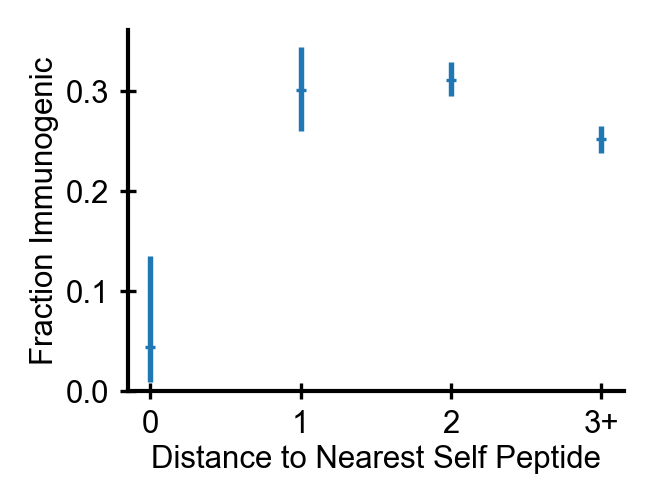

In [14]:
fig, ax = plt.subplots(figsize=(2.25, 1.75))
lower, upper = statsmodels.stats.proportion.proportion_confint(ps*ns, ns, method='jeffreys')
ax.errorbar(range(len(ps)), ps, yerr=[ps-lower, upper-ps], ls='None', fmt='_')
ax.set_ylim(0.0)
ax.set_xlabel('Distance to Nearest Self Peptide')
ax.set_ylabel('Fraction Immunogenic')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([0, 1, 2, '3+'])
fig.tight_layout()
fig.savefig(figuredir+'iedbposvsdist.svg')

In [15]:
test = statsmodels.stats.proportion.proportions_chisquare_allpairs(ps*ns, ns)
list(zip(test.all_pairs, test.pval_corrected()))

[((0, 1), 0.0009961961479924009),
 ((0, 2), 0.0005836435612557311),
 ((0, 3), 0.004193083372096229),
 ((1, 2), 0.6487733174873035),
 ((1, 3), 0.045780441088422386),
 ((2, 3), 3.421495625710591e-07)]

In [16]:
df_t[df_t['Epitope', 'Description'].isin(set(d[(d['nndist']==0) & d['Assay', 'Positive']]['Epitope', 'Description']))]

Reference  \
                                 Assay IRI   
322919   http://www.iedb.org/assay/3193385   
397160  http://www.iedb.org/assay/12566377   

                                                                       \
                                Reference IRI        Type   PubMed ID   
322919  http://www.iedb.org/reference/1031485  Literature  28148797.0   
397160  http://www.iedb.org/reference/1038020  Literature  33490292.0   

                                                                          \
                                                  Authors        Journal   
322919  Alba Grifoni; Michael Angelo; John Sidney; Sin...        J Virol   
397160  Yan Lin; Yu Dong; Yanfeng Gao; Ranran Shi; Yub...  J Immunol Res   

                                                                               \
        Date                                              Title Submission ID   
322919  2017  Patterns of Cellular Immunity Associated with ...           NaN   
397160  2021  Identification of CTL Epitopes on Efflux Pumps...           NaN   

                                   Epitope  ...  \
                               Epitope IRI  ...   
322919  http://www.iedb.org/epitope/184390  ...   
397160   http://www.iedb.org/epitope/37149  ...   

                                            Assay Antigen  \
                              Antigen Source Molecule IRI   
322919     http://www.ncbi.nlm.nih.gov/protein/ANW72071.1   
397160  http://www.ncbi.nlm.nih.gov/protein/WP_0039014...   

                                                           \
                                      Protein Parent Name   
322919                                 Genome polyprotein   
397160  Energy-dependent translational throttle protei...   

                                                                           \
                           Protein Parent IRI       Antigen Organism Name   
322919  http://www.uniprot.org/uniprot/P17763              Dengue virus 4   
397160  http://www.uniprot.org/uniprot/P9WQK3  Mycobacterium tuberculosis   

                                                        \
                                  Antigen Organism IRI   
322919  http://purl.obolibrary.org/obo/NCBITaxon_11070   
397160   http://purl.obolibrary.org/obo/NCBITaxon_1773   

                                    \
             Organism Species Name   
322919                Dengue virus   
397160  Mycobacterium tuberculosis   

                                                        \
                                  Organism Species IRI   
322919  http://purl.obolibrary.org/obo/NCBITaxon_12637   
397160   http://purl.obolibrary.org/obo/NCBITaxon_1773   

                                           Assay Comments    Assay Epitope  
                                           Assay Comments Positive  Length  
322919  The epitope was also shown previously to be re...     True       9  
397160                             ICS was also positive.     True       9  

[2 rows x 144 columns]

In [18]:
epitopes = d[d['nndist']==1]['Epitope', 'Description']

In [27]:
neighbors = []
diffposs = []
for epitope in epitopes:
    all_neighbors = set(hamming_neighbors(epitope)).intersection(selfset)
    if len(all_neighbors)>1:
        diffposs.append(np.nan)
        continue
    neighbor = random.choice(list(all_neighbors))
    neighbors.append(neighbor)
    diffpos = int(np.where(np.array(list(epitope)) != np.array(list(neighbor)))[0])
    diffposs.append(diffpos)
    print(epitope,
          neighbor,
          len(all_neighbors),
          diffpos)
neighbors = np.array(neighbors)
diffposs = np.array(diffposs)

AAAPVVESK AAAKVVESK 1 3
AEFTVPKFL ADFTVPKFL 1 1
AEMLREEGY AEMIREEGY 1 3
AESRKLLLI AESRKLLLR 1 8
AKLDRLDEE AKLDNLDEE 1 4
ALDGYNGTV ALDGYNGTI 1 8
ALFASRPRF VLFASRPRF 1 0
ALIIIRSLL ARIIIRSLL 1 1
ALIRILQQL ALDRILQQL 1 2
ALIRRLQQL ALIRRLQQA 1 8
ALPQSILLF ALPRSILLF 1 3
ALQSQSISL VLQSQSISL 1 0
ALVVPVFEI ALVVPAFEI 1 5
ALYDGMEHL GLYDGMEHL 1 0
AMAGASTSA ASAGASTSA 1 1
AMASASTSA AMASASSSA 1 6
AMAVLYLAL AVAVLYLAL 1 1
AMLSKVVIL AMPSKVVIL 1 2
APKKKSIKL APKKKSIKS 1 8
APVPPPEPL APVVPPEPL 1 3
AYLEAIHDF AYLEAIHNF 1 7
AYLEAIHKF AYLEAIHNF 1 7
AYLEAIHYF AYLEAIHNF 1 7
CLYDGMEHL GLYDGMEHL 1 0
CTELKLSDN VTELKLSDN 1 0
DEQIESMTY DEQMESMTY 1 3
DESTLSPEM DESTLSPEE 1 8
DIDSAIETY DIDAAIETY 1 3
DLQDRNTEL DLQDRNDEL 1 6
DLYDGMEHL GLYDGMEHL 1 0
DMKARQKAL DMKARQEAL 1 6
DRFYKVLRA DRFYKVLTA 1 7
DYVSALHPV DHVSALHPV 1 1
EEAIVAYTL EEAPVAYTL 1 3
EEFWLVDLL EEFRLVDLL 1 3
EEKSDINTL EEKSDIETL 1 6
EELKQKLRL EEQKQKLRL 1 2
EELSATVPS EEPSATVPS 1 2
EEQILASIL FEQILASIL 1 0
EFQVVNPHL EFQIVNPHL 1 3
EISDRFIGI EISDRLIGI 1 5
ELAGIGILT EAAGIG

In [28]:
df_d1 = d[d['nndist']==1]
df_d1['Position difference'] = diffposs

/tmp/ipykernel_62262/3672595624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d1['Position difference'] = diffposs


/home/amayer/anaconda3/envs/py3/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


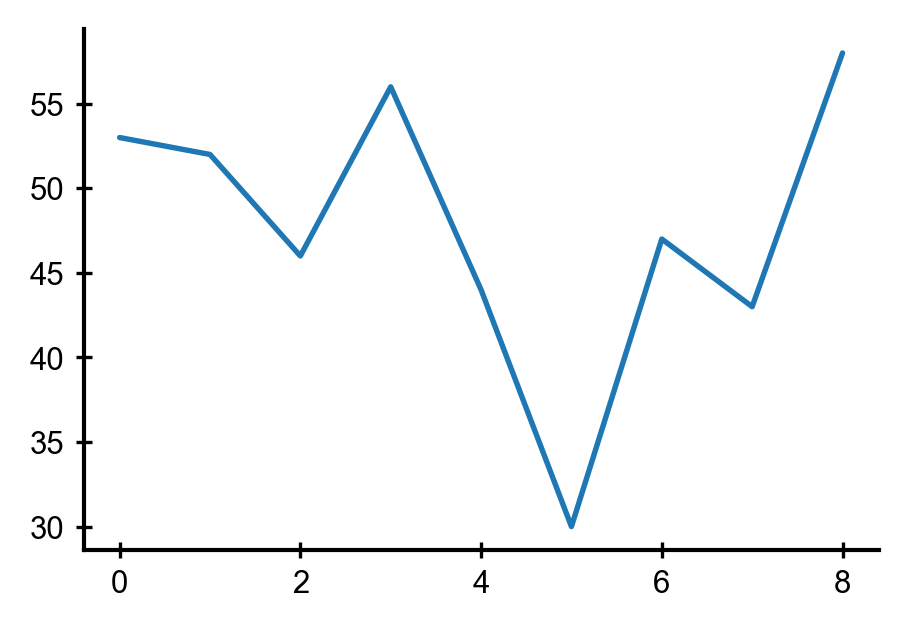

In [29]:
plt.plot(df_d1.groupby('Position difference').agg('count')['Epitope', 'Description'])

(0.0, 1.0)

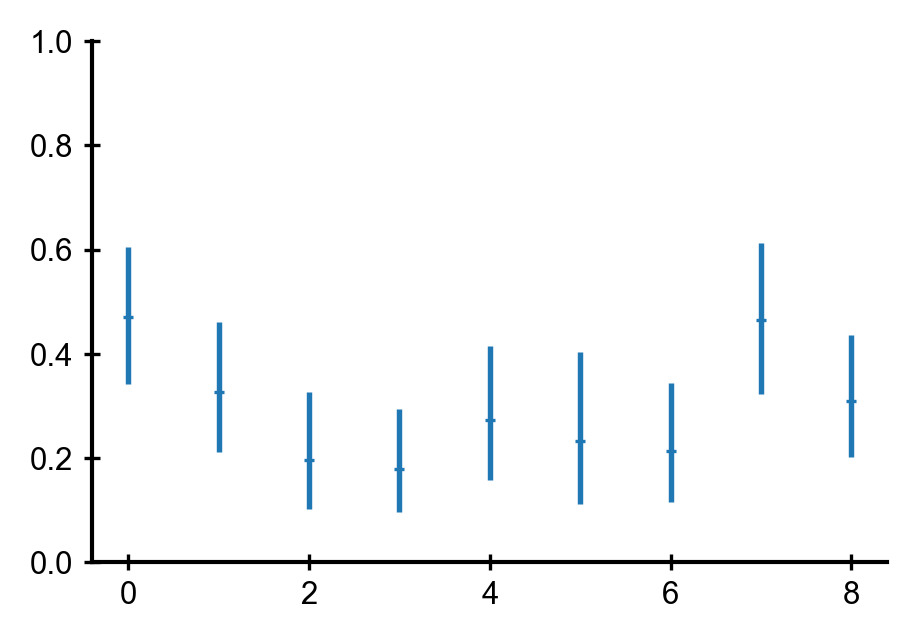

In [30]:
ps = df_d1.groupby('Position difference').agg('mean')['Assay', 'Positive']
ns = df_d1.groupby('Position difference').agg('count')['Assay', 'Positive']
lower, upper = statsmodels.stats.proportion.proportion_confint(ps*ns, ns, method='jeffreys')

fig, ax = plt.subplots()
ax.errorbar(range(len(ps)), ps, yerr=[ps-lower, upper-ps], ls='None', fmt='_')
ax.set_ylim(0, 1)

In [31]:
test = statsmodels.stats.proportion.proportions_chisquare_allpairs(ps*ns, ns)
list(zip(test.all_pairs, test.pval_corrected()))

[((0, 1), 0.9533115833859412),
 ((0, 2), 0.12489858215102811),
 ((0, 3), 0.037207132745341154),
 ((0, 4), 0.7251991485096807),
 ((0, 5), 0.6239393467691854),
 ((0, 6), 0.19949383130547804),
 ((0, 7), 0.9999426126193741),
 ((0, 8), 0.8800532697266227),
 ((1, 2), 0.9597387545853306),
 ((1, 3), 0.8691557725111363),
 ((1, 4), 0.9998199199709852),
 ((1, 5), 0.9990137498141586),
 ((1, 6), 0.98309331985116),
 ((1, 7), 0.9754356070652951),
 ((1, 8), 0.9999426126193741),
 ((2, 3), 0.9999426126193741),
 ((2, 4), 0.9990137498141586),
 ((2, 5), 0.9999426126193741),
 ((2, 6), 0.9999426126193741),
 ((2, 7), 0.19949383130547804),
 ((2, 8), 0.9795693280151526),
 ((3, 4), 0.9939072494771961),
 ((3, 5), 0.9998199199709852),
 ((3, 6), 0.9999426126193741),
 ((3, 7), 0.07108612989084995),
 ((3, 8), 0.9248896907945157),
 ((4, 5), 0.9999426126193741),
 ((4, 6), 0.999780292202223),
 ((4, 7), 0.826461628496635),
 ((4, 8), 0.9999426126193741),
 ((5, 6), 0.9999426126193741),
 ((5, 7), 0.7251991485096807),
 ((5, 